# Description
The eighth practical project in the [Super Data Science](https://superdatascience.com) [Python 3 Masterclass](https://www.superdatascience.com/courses/python-3-programming-beginner-to-pro-masterclass) is an analysis of user reviews for the [Amazon Alexa Smart Speaker](https://en.wikipedia.org/wiki/Amazon_Echo) using data from [Kaggle](https://www.kaggle.com/).

## Import the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Dataset is available from Kaggle at http://www.kaggle.com/sid321axn/amazon-alexa-reviews
alexa_data = pd.read_csv('amazon_alexa.tsv', sep='\t')

## Exploratory Analysis
Some quick exploratory analysis to get a feel for the dataset.

In [3]:
alexa_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
alexa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
alexa_data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


The next bit of analysis transforms the **verified_reviews** column into a vector, or matrix. Each column in the matrix represents a single word from all the words used in all the reviews. The columns are the reviews. The value stored at each intersection of column and row is the count of the number of times that the word... represented by the column... appears in the review.

In [21]:
vectorizer = CountVectorizer()
reviews_vector = vectorizer.fit_transform(alexa_data['verified_reviews'])
print(reviews_vector)

  (0, 2150)	1
  (0, 2320)	1
  (0, 1160)	1
  (1, 2151)	1
  (1, 1933)	1
  (2, 1933)	1
  (2, 3289)	1
  (2, 3945)	2
  (2, 2640)	1
  (2, 1504)	1
  (2, 4028)	3
  (2, 588)	1
  (2, 256)	1
  (2, 2794)	1
  (2, 853)	1
  (2, 559)	1
  (2, 196)	1
  (2, 3059)	1
  (2, 1567)	1
  (2, 4008)	1
  (2, 250)	2
  (2, 259)	1
  (2, 3578)	1
  (2, 3044)	1
  (2, 314)	1
  :	:
  (3148, 2827)	1
  (3148, 3487)	1
  (3148, 3330)	1
  (3148, 2789)	2
  (3148, 3607)	1
  (3148, 1553)	1
  (3148, 569)	1
  (3148, 1106)	1
  (3148, 3283)	1
  (3148, 1475)	1
  (3148, 1481)	1
  (3148, 1113)	2
  (3148, 1730)	1
  (3148, 3508)	1
  (3148, 1983)	1
  (3148, 1927)	1
  (3148, 2300)	1
  (3148, 347)	1
  (3148, 2023)	1
  (3148, 3408)	1
  (3148, 765)	1
  (3148, 2257)	1
  (3148, 1729)	1
  (3148, 505)	1
  (3149, 1561)	1


Here we look at the words found in the first review (row 0).

In [20]:
print(vectorizer.get_feature_names()[2150])
print(vectorizer.get_feature_names()[2320])
print(vectorizer.get_feature_names()[1160])

love
my
echo


With further analysis, we can examine whether the appearance of certain words, or the number of times any words are used, corrolates to the rating.

## More Exploratory Analysis (Visuals)
Continuing with explorator analysis, but now with some simple graphs.

<AxesSubplot:xlabel='feedback', ylabel='count'>

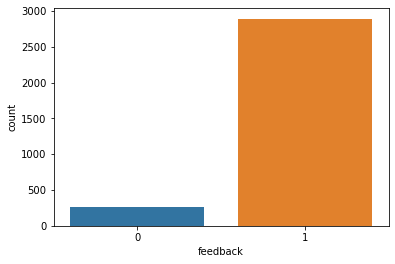

In [6]:
sns.countplot(x = alexa_data['feedback'])

<AxesSubplot:xlabel='rating', ylabel='count'>

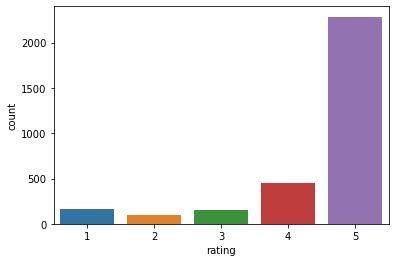

In [7]:
sns.countplot(x = 'rating', data = alexa_data)

<AxesSubplot:>

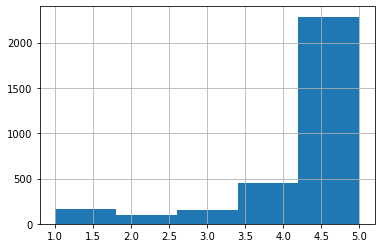

In [8]:
alexa_data['rating'].hist(bins = 5)

<AxesSubplot:xlabel='variation', ylabel='rating'>

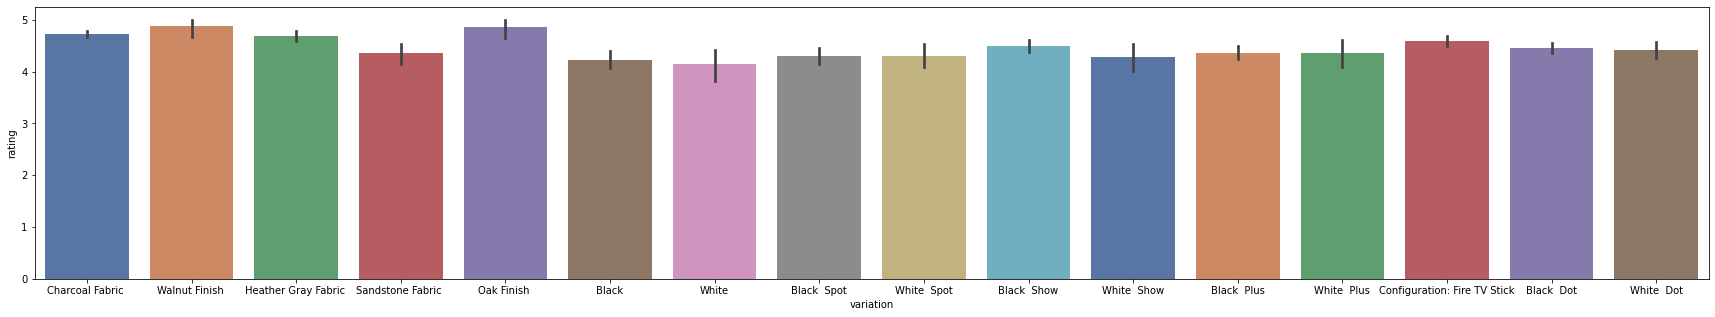

In [9]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'variation', y = 'rating', data = alexa_data, palette = 'deep')

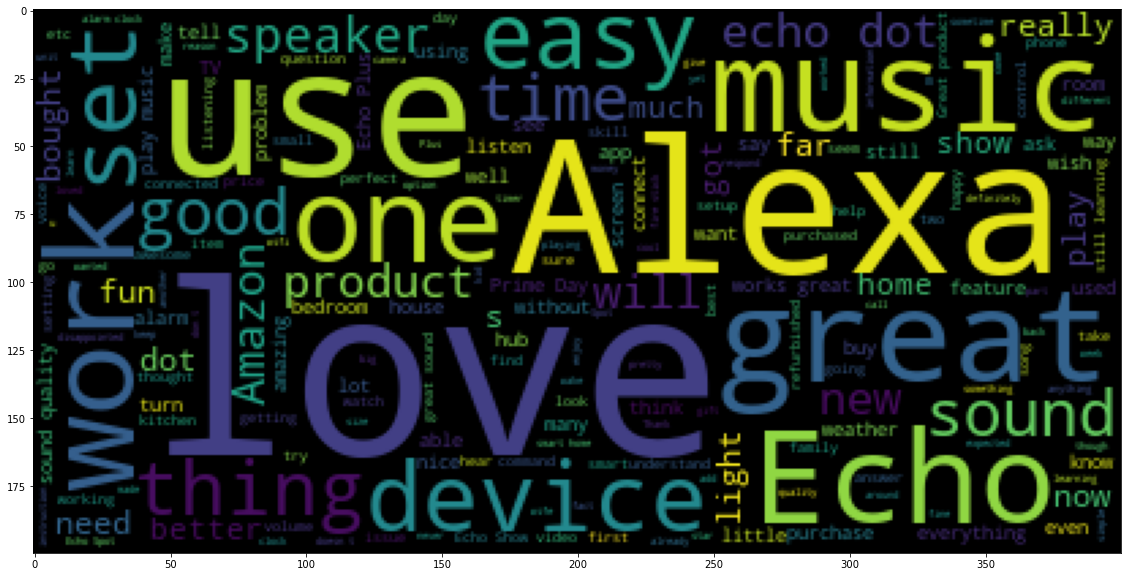

In [10]:
plt.figure(figsize = (20, 10))
plt.imshow(WordCloud().generate("".join(alexa_data['verified_reviews'].tolist())))